# frozen model and reference

https://github.com/Az4z3l/CarND-Traffic-Light-Detection

checkout the older version of Tensorflow object detection to be compatible with V1.3.0

git checkout d135ed9c04bc9c60ea58f493559e60bc7673beb7

In [1]:
import tensorflow as tf
print(tf.__version__)

import os
os.environ['PYTHONPATH'] += ':/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/exporter/:/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/exporter/slim/:/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/exporter/object_detection'


1.3.0


In [2]:
%cd /home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/colab_work_new/

lst = os.listdir('mixed_model')
lf = filter(lambda k: 'model.ckpt-' in k, lst)
last_model = sorted(lf)[-1].replace('.meta', '')


!python /home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/exporter/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/colab_work_new/config/ssd_mobilenet_v2_traffic_mixed.config \
    --output_directory=mixed_model/fine_tuned_model_real_mobilenet \
    --trained_checkpoint_prefix=mixed_model/$last_model

/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/colab_work_new
/home/kang/anaconda3/envs/tensorflow_1.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
2019-03-07 14:56:09.191562: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
Converted 324 variables to const ops.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageDraw
from PIL import ImageColor

from glob import glob

import sys
sys.path.append('/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/exporter/object_detection')
sys.path.append('/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/exporter')

from utils import label_map_util
from utils import visualization_utils as vis_util

%matplotlib inline

/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/exporter/object_detection/utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/kang/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/kang/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/kang/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 

In [4]:
SSD_GRAPH_FILE = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/colab_work_new/mixed_model/fine_tuned_model_real_mobilenet/frozen_inference_graph.pb'

PATH_TO_LABELS = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/colab_work_new/config/labels_map.pbtxt'
NUM_CLASSES = 3

In [5]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [6]:
detection_graph = load_graph(SSD_GRAPH_FILE)

In [7]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Yellow'}, 3: {'id': 3, 'name': u'Red'}}


SCORES
[[ 0.92800349  0.4195689   0.02566536  0.02001147  0.01251672  0.01139718
   0.00828104  0.00751019  0.00692272  0.00656405]]
CLASSES
[[ 2.  1.  1.  1.  1.  2.  1.  1.  1.  1.]]


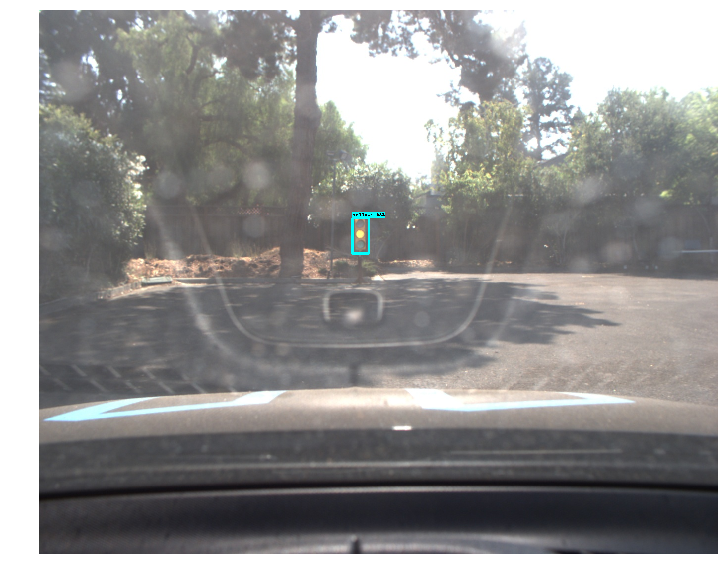

SCORES
[[ 0.98973244  0.03158636  0.02286645  0.01078238  0.00995978  0.00805902
   0.00796935  0.00590155  0.004865    0.00478058]]
CLASSES
[[ 2.  3.  1.  1.  1.  1.  1.  2.  2.  1.]]


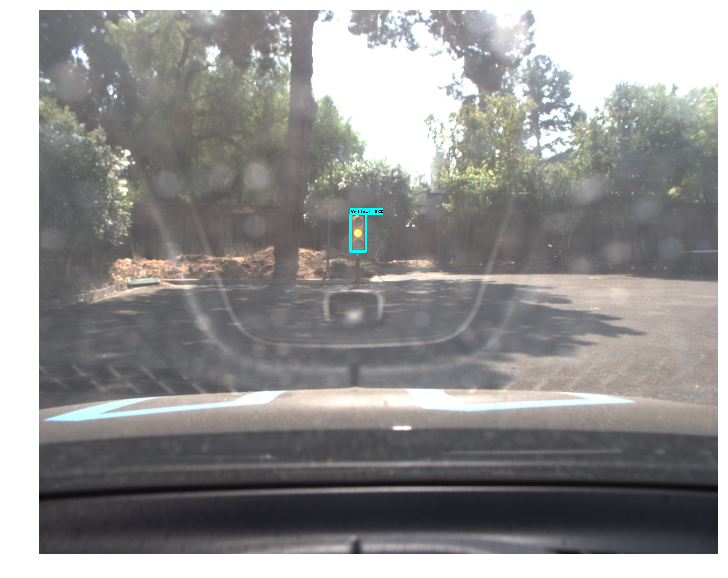

SCORES
[[ 0.72008866  0.03595221  0.01448538  0.0107115   0.00824131  0.00760615
   0.00717391  0.00664397  0.00544521  0.00518252]]
CLASSES
[[ 1.  1.  1.  1.  1.  3.  1.  1.  3.  1.]]


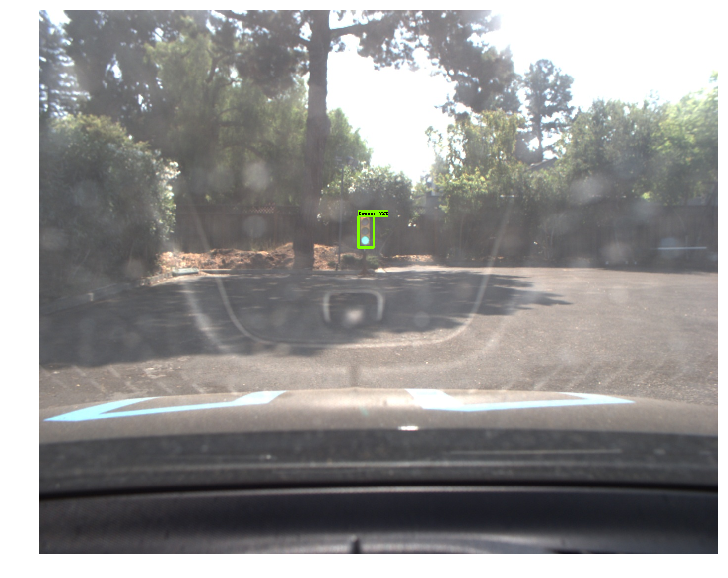

SCORES
[[ 0.96309847  0.10269675  0.02743698  0.02122293  0.01808575  0.01735882
   0.01441837  0.00858188  0.00846309  0.00689739]]
CLASSES
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


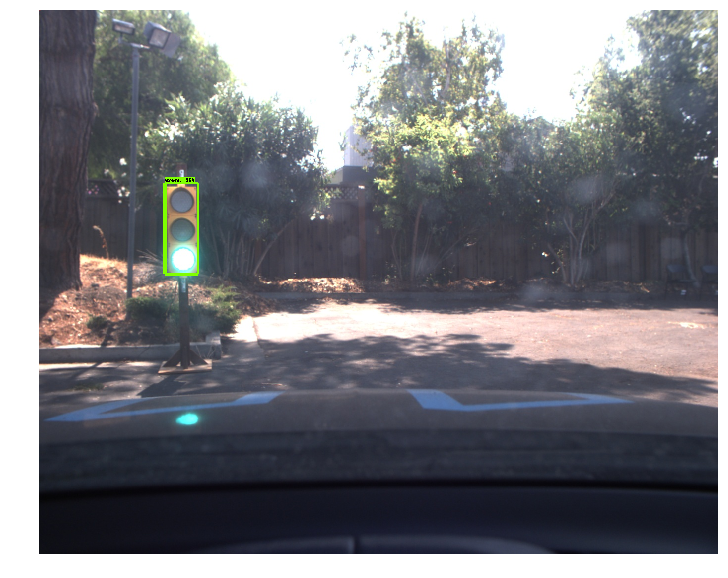

SCORES
[[ 0.99896419  0.35794267  0.30288196  0.14257623  0.04284881  0.03414452
   0.02910438  0.02855999  0.01002921  0.00927927]]
CLASSES
[[ 3.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


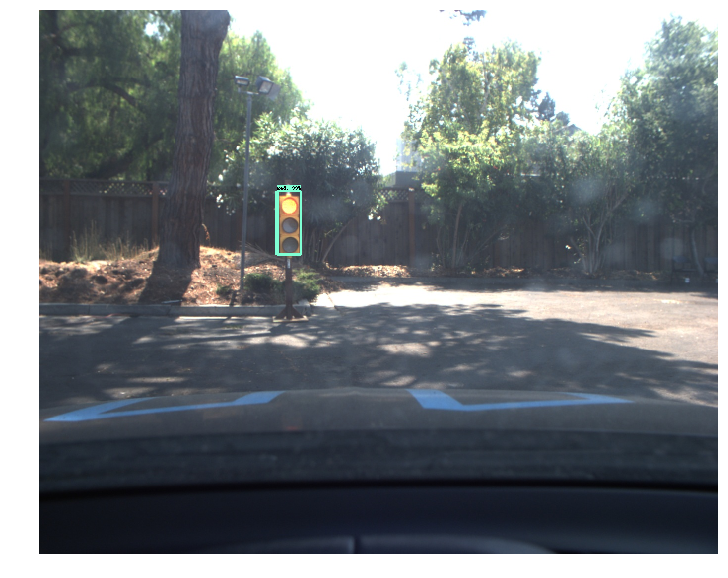

SCORES
[[ 0.99424028  0.33185917  0.3192139   0.1012858   0.05532512  0.03621604
   0.03055816  0.01182984  0.01110851  0.01045883]]
CLASSES
[[ 3.  1.  1.  1.  1.  1.  1.  1.  1.  3.]]


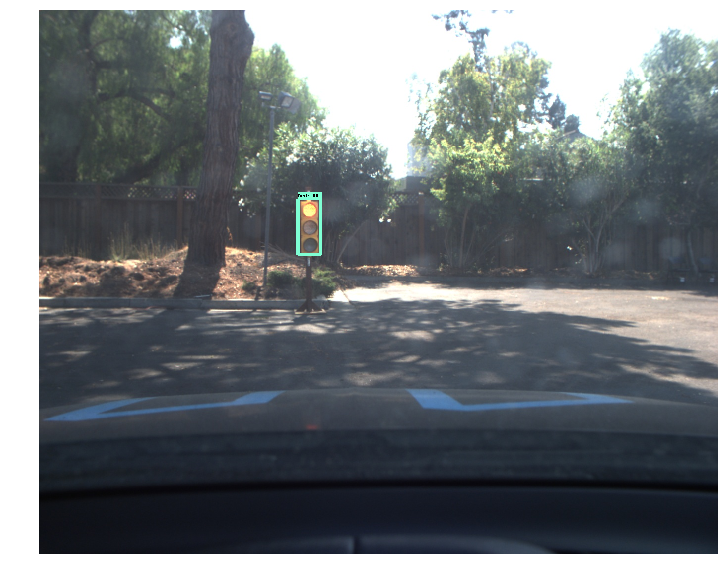

SCORES
[[ 0.98961115  0.05974616  0.01836053  0.01687465  0.01447406  0.01221825
   0.00736984  0.00735133  0.00438021  0.00358977]]
CLASSES
[[ 3.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


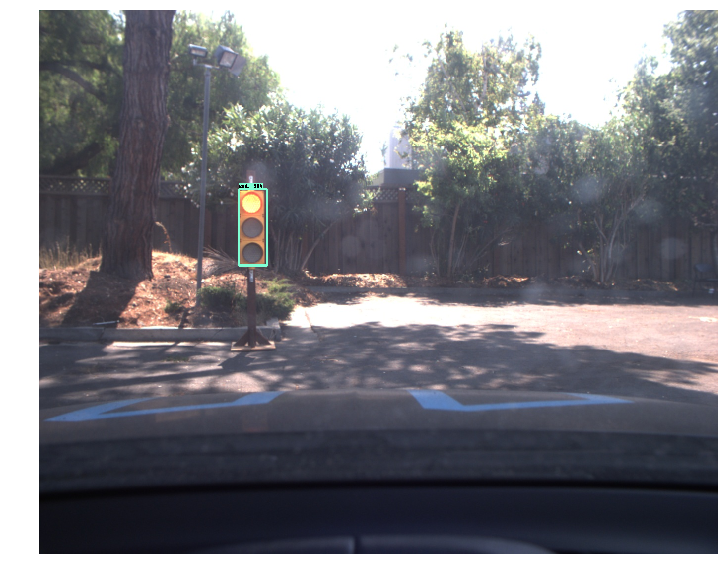

SCORES
[[ 0.96124661  0.06556455  0.0203973   0.01356484  0.00782876  0.00693144
   0.00618089  0.00467984  0.00440468  0.00348374]]
CLASSES
[[ 2.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


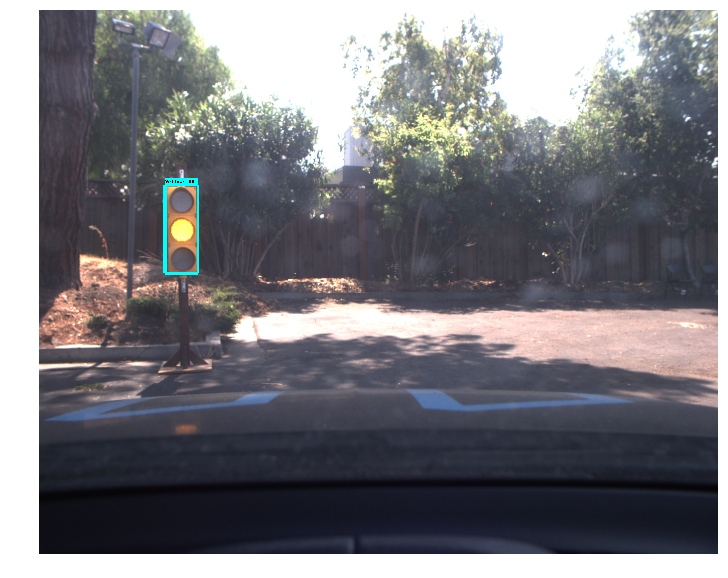

In [8]:
PATH_TO_IMGS = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/traffic_light_detection_dataset/real_test_imgs'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
IMAGE_SIZE = (15, 10)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores)
            print('CLASSES')
            print(classes)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=5)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.axis('off')
            plt.show()
            
            if idx == 10:
                break

SCORES
[[ 0.99882072  0.98883551  0.97735256  0.12263106  0.00707016  0.00675952
   0.00549424  0.00525098  0.00399834  0.00374997]]
CLASSES
[[ 3.  3.  3.  3.  2.  1.  1.  2.  1.  1.]]


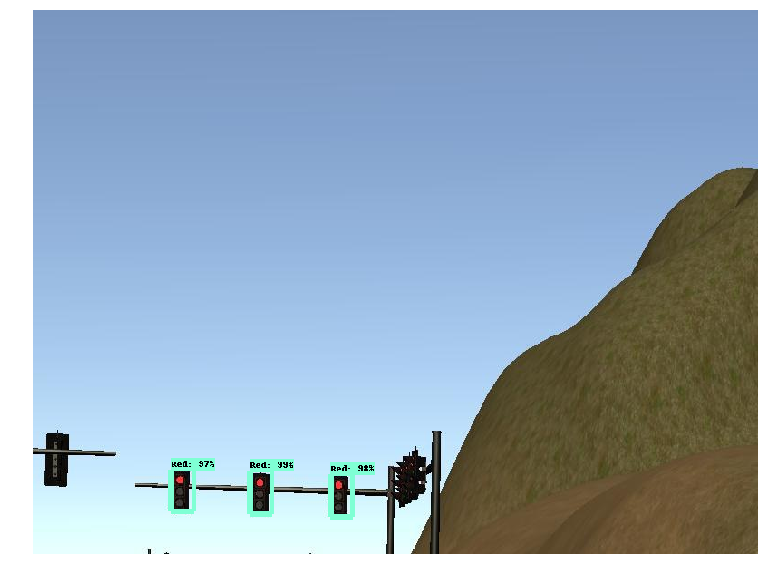

SCORES
[[ 0.70806074  0.69517487  0.15513732  0.06571422  0.04701712  0.01404752
   0.01256303  0.00801143  0.00796485  0.00739319]]
CLASSES
[[ 2.  2.  2.  2.  2.  2.  2.  1.  1.  2.]]


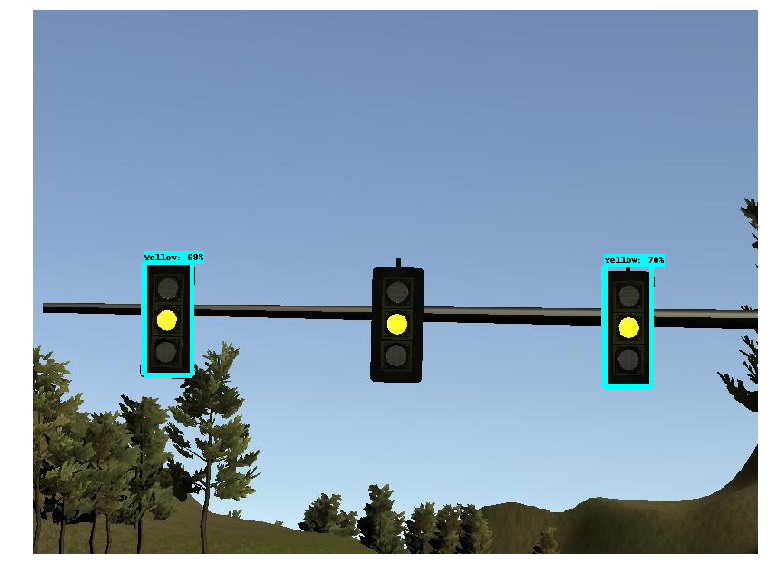

SCORES
[[ 0.95381278  0.87204742  0.86894065  0.16490239  0.07674906  0.01090094
   0.00906864  0.00488736  0.00457941  0.0041787 ]]
CLASSES
[[ 1.  1.  1.  3.  2.  1.  3.  3.  1.  1.]]


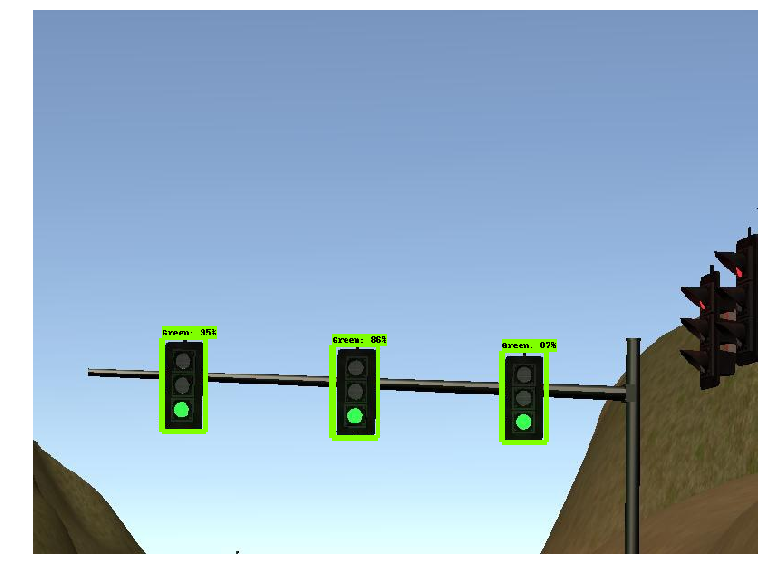

In [9]:
PATH_TO_IMGS = '/home/kang/Documents/py/py_auto_driving/py_traffic_light_detection/google_colab_work/work/traffic_light_detection_dataset/test_imgs/'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
IMAGE_SIZE = (15, 10)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores)
            print('CLASSES')
            print(classes)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=5)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.axis('off')
            plt.show()
            
            if idx == 10:
                break